In [11]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
raw_data = pd.read_csv('Customer_Data.csv')

In [13]:
raw_data.head()

,customer_id,age,gender,country,monthly_visits,amount_spent,joined_year
0,1,51,Male,South Africa,6,17.29,2016
1,2,64,Male,UK,5,22.02,2016
2,3,41,Female,Kenya,3,30.64,2018
3,4,27,Male,South Africa,2,56.95,2020
4,5,55,Female,Kenya,7,30.75,2016


In [14]:
# Check for missing values
raw_data.isnull().sum()


customer_id       0
age               0
gender            0
country           0
monthly_visits    0
amount_spent      0
joined_year       0
dtype: int64

In [15]:
# Check for duplicates
raw_data.duplicated().sum()

np.int64(0)

In [16]:
# Remove duplicates
raw_data = raw_data.drop_duplicates()


In [17]:
# Check if Country columns have consistent spellings
raw_data['country'].unique()



array(['South Africa', 'UK', 'Kenya', 'USA', 'Nigeria', 'Ghana'],
      dtype=object)

In [18]:
# Check if Gender have consistent spellings
raw_data['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [19]:
# Covert Year Joined to datetime format
raw_data['joined_date'] = pd.to_datetime(raw_data['joined_year'].astype(str) + '-01-01')

In [20]:
# Calculate number of years as customer
raw_data['years_as_customer'] = 2025 - raw_data['joined_year']

In [21]:
raw_data

,customer_id,age,gender,country,monthly_visits,amount_spent,joined_year,joined_date,years_as_customer
0,1,51,Male,South Africa,6,17.29,2016,2016-01-01,9
1,2,64,Male,UK,5,22.02,2016,2016-01-01,9
2,3,41,Female,Kenya,3,30.64,2018,2018-01-01,7
3,4,27,Male,South Africa,2,56.95,2020,2020-01-01,5
4,5,55,Female,Kenya,7,30.75,2016,2016-01-01,9
...,...,...,...,...,...,...,...,...,...
4995,4996,62,Other,UK,6,39.91,2024,2024-01-01,1
4996,4997,34,Other,USA,7,113.14,2016,2016-01-01,9
4997,4998,41,Other,UK,2,171.06,2024,2024-01-01,1
4998,4999,34,Male,Ghana,6,31.84,2016,2016-01-01,9


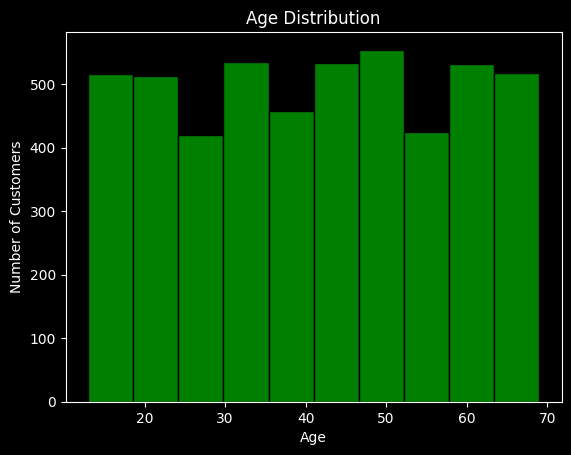

In [22]:
# Age Distribution

plt.hist(raw_data['age'], bins=10, color='green', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.title('Age Distribution')
plt.show()


In [23]:
# The Country with the most customers
country_counts = raw_data['country'].value_counts()

In [24]:
country_counts

country
USA             862
Ghana           861
South Africa    833
Kenya           819
Nigeria         819
UK              806
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of Customers by Country')

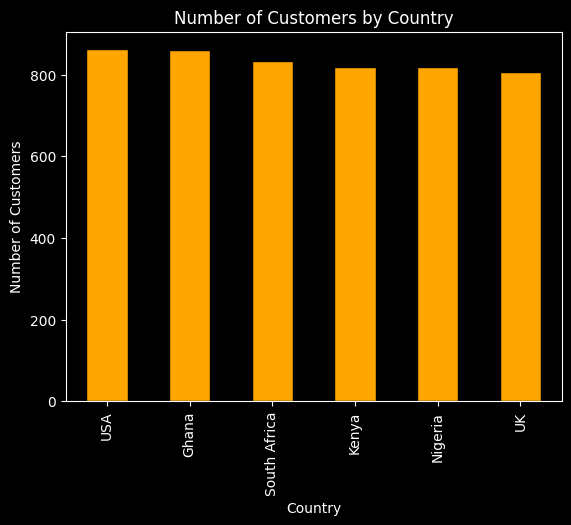

In [25]:
country_counts.plot(kind='bar', color='orange', edgecolor='black')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by Country')

In [26]:
#Which gender spends the most on average?
gender_expenses = raw_data.groupby('gender')['amount_spent'].mean()


In [27]:
gender_expenses

gender
Female    49.267966
Male      50.639685
Other     50.605449
Name: amount_spent, dtype: float64

In [28]:
#What is the relationship between monthly visits and amount spent?
raw_data[['monthly_visits', 'amount_spent']].corr()


,monthly_visits,amount_spent
monthly_visits,1.000000,-0.003808
amount_spent,-0.003808,1.000000


Text(0.5, 1.0, 'Monthly Visits vs Amount Spent')

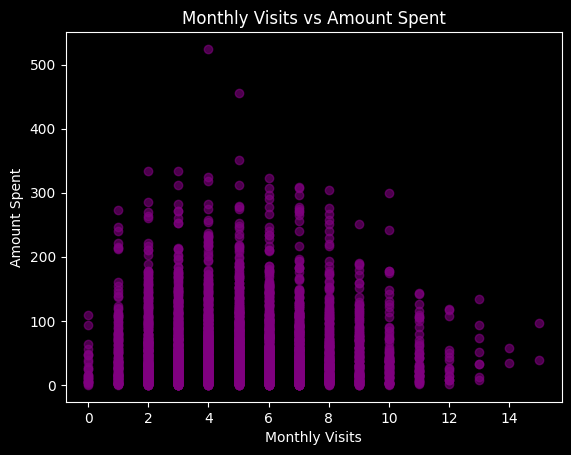

In [29]:
#What is the relationship between monthly visits and amount spent? Visuals
plt.scatter(raw_data['monthly_visits'], raw_data['amount_spent'], color='purple', alpha=0.6)
plt.xlabel('Monthly Visits')
plt.ylabel('Amount Spent')
plt.title('Monthly Visits vs Amount Spent')

In [30]:
#How many customers joined each year?
year_count = raw_data['joined_year'].value_counts()

In [31]:
year_count

joined_year
2023    543
2019    524
2020    518
2016    500
2021    493
2017    493
2018    490
2015    488
2022    483
2024    468
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of Customers Joined Each Year')

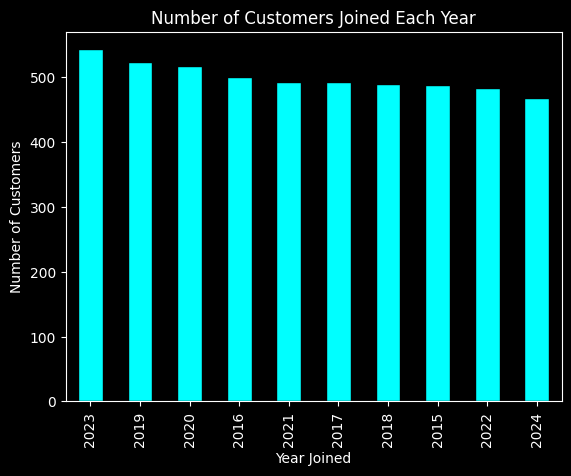

In [32]:
# Visualize number of customers joined each year
year_count.plot(kind='bar', color='cyan', edgecolor='black')
plt.xlabel('Year Joined')
plt.ylabel('Number of Customers')
plt.title('Number of Customers Joined Each Year')

In [33]:
raw_data.head()

,customer_id,age,gender,country,monthly_visits,amount_spent,joined_year,joined_date,years_as_customer
0,1,51,Male,South Africa,6,17.29,2016,2016-01-01,9
1,2,64,Male,UK,5,22.02,2016,2016-01-01,9
2,3,41,Female,Kenya,3,30.64,2018,2018-01-01,7
3,4,27,Male,South Africa,2,56.95,2020,2020-01-01,5
4,5,55,Female,Kenya,7,30.75,2016,2016-01-01,9


In [34]:
# Are newer customers spending more or less than older ones?
new_customers = raw_data.groupby('joined_year')['amount_spent'].mean().sort_values(ascending=False)


In [35]:
new_customers

joined_year
2020    53.232181
2024    53.020534
2018    52.476265
2017    50.780527
2019    49.879561
2015    49.549631
2016    49.273000
2022    48.728841
2023    48.428785
2021    46.463124
Name: amount_spent, dtype: float64

Text(0.5, 1.0, 'Average Amount Spent by Year Joined')

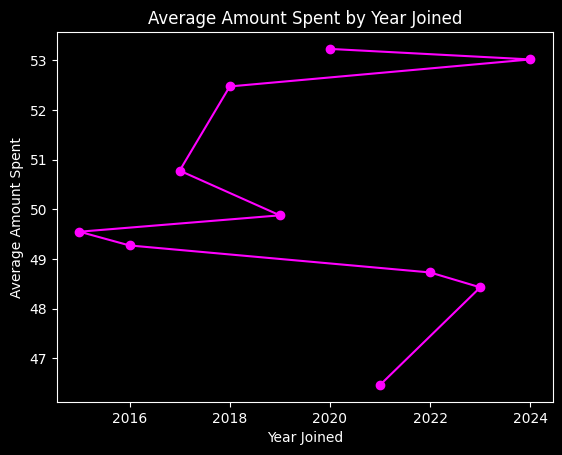

In [36]:
# Visusalize spending habits of newer vs older customers
new_customers.plot(kind='line', marker='o', color='magenta')
plt.xlabel('Year Joined')
plt.ylabel('Average Amount Spent')
plt.title('Average Amount Spent by Year Joined')

In [37]:
# How does country affect visit frequency and spending?
country_summary = raw_data.groupby('country').agg({'monthly_visits': 'mean', 'amount_spent': 'mean', 'customer_id': 'count'}).rename(columns={'monthly_visits': 'avg_monthly_visits', 'amount_spent': 'avg_amount_spent', 'customer_id': 'Number_of_customers'}   )

In [38]:
country_summary


,avg_monthly_visits,avg_amount_spent,Number_of_customers
country,,,
Ghana,5.067364,52.610256,861
Kenya,4.991453,49.598584,819
Nigeria,4.923077,47.529255,819
South Africa,5.105642,50.458739,833
UK,5.158809,49.159243,806
USA,4.958237,51.426021,862


Text(0.5, 1.0, 'Average Amount Spent by Country')

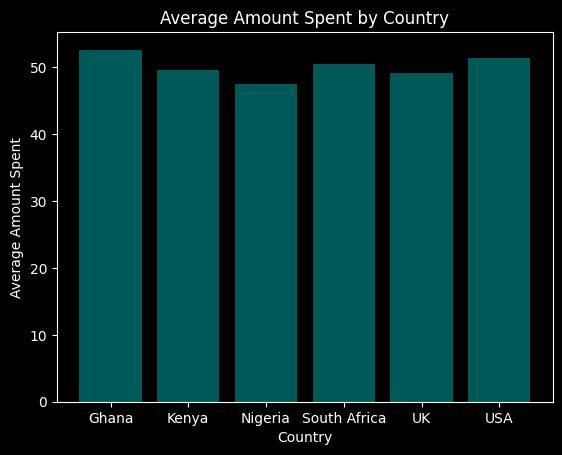

In [39]:
# Visualizing How country affects spending
plt.bar(country_summary.index, country_summary['avg_amount_spent'], color='teal', alpha=0.7, label='Avg Amount Spent')
plt.xlabel('Country')
plt.ylabel('Average Amount Spent')
plt.title('Average Amount Spent by Country')

Text(0.5, 1.0, 'Average Monthly Visits by Country')

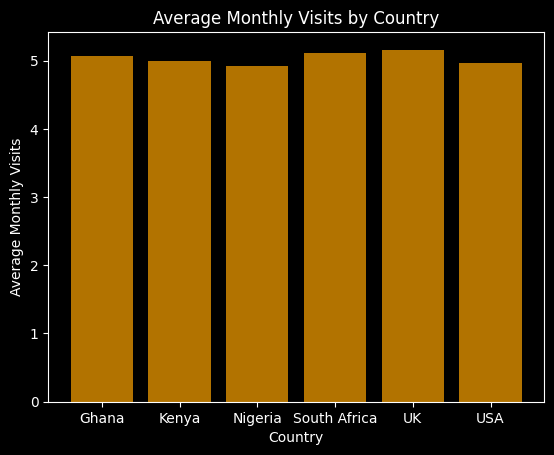

In [40]:
# Visualizing How country affects visit frequency
plt.bar(country_summary.index, country_summary['avg_monthly_visits'], color='orange', alpha=0.7, label='Avg Monthly Visits')
plt.xlabel('Country')
plt.ylabel('Average Monthly Visits')
plt.title('Average Monthly Visits by Country')

In [41]:
# Can you segment customers into groups (e.g., low spenders vs high spenders)?
# Calculate percentiles
q1 = raw_data['amount_spent'].quantile(0.25)
q3 = raw_data['amount_spent'].quantile(0.75)

# Create a spending segment column
def spending_segment(x):
    if x <= q1:
        return 'Low Spender'
    elif x <= q3:
        return 'Medium Spender'
    else:
        return 'High Spender'




In [42]:
#raw_data['spending_segment'] = df['amount_spent'].apply(spending_segment)